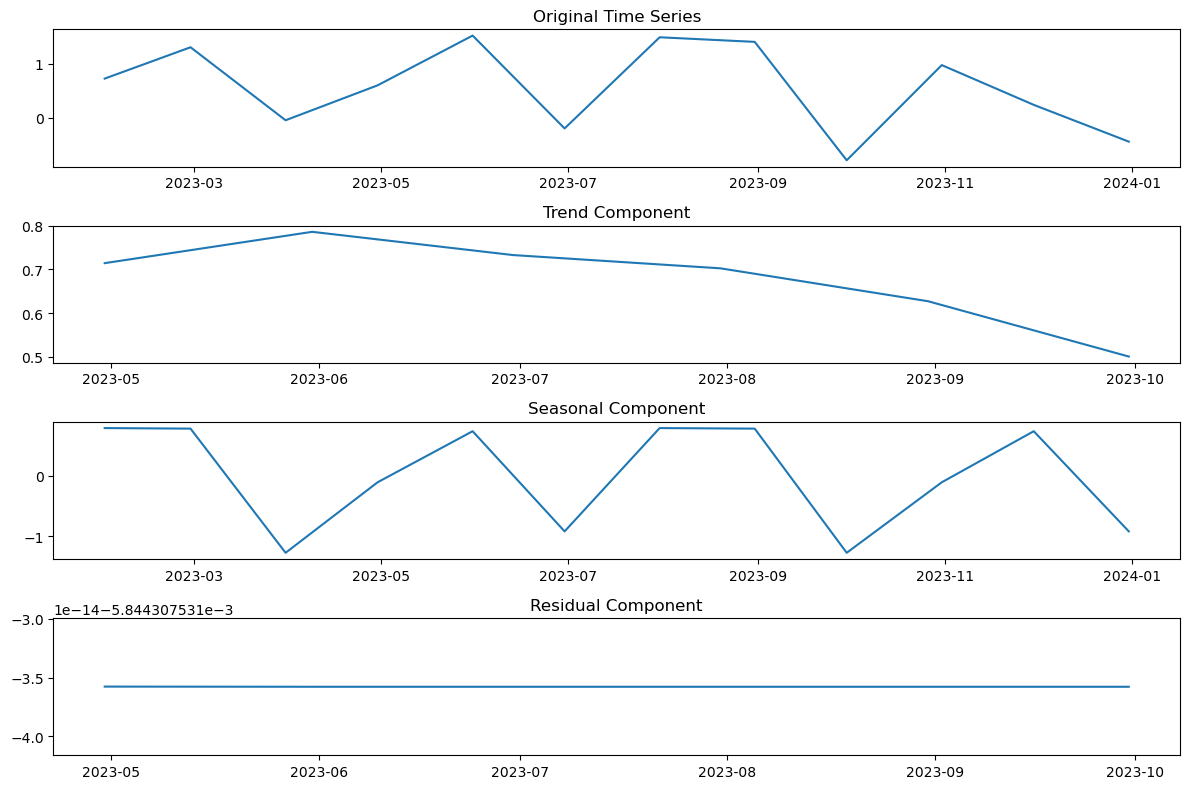

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Generate random data with sinusoidal seasonal component
random_data = np.random.rand(12)  # Generate 12 random values between 0 and 1
sinusoidal_data = np.sin(np.linspace(0, 24, 12))  # Generate a sinusoidal pattern with 12 points

# Add the two arrays together
seasonal_data = random_data + sinusoidal_data

# Adjust the date range to match the length of seasonal_data
data = {
    'Date': pd.date_range(start='01/01/2023', periods=12, freq='ME'),
    'Close': seasonal_data
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Close'], model='additive', period=6)  # Assuming monthly data with a seasonal period of 12 months

# Plot the original time series
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.title('Original Time Series')

# Plot the trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component')

# Plot the seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')

# Plot the residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

# Remove the seasonal component
detrended = df['Close'] - decomposition.seasonal


In [2]:
# Check for stationarity using ADF test

result = adfuller(df['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -19.187619368419917
p-value: 0.0
Critical Values:
	1%: -4.9386902332361515
	5%: -3.477582857142857
	10%: -2.8438679591836733
